# apply_chords_3D
an example for the use of porespy.filters.apply_chords_3D

Adds chords to the void space in all three principle directions.  The chords are seprated by 1 voxel plus the provided spacing.  Chords in the X, Y and Z directions are labelled 1, 2 and 3 resepctively.

## Import packages

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage
ps.visualization.set_mpl_style()

## Create image and variables

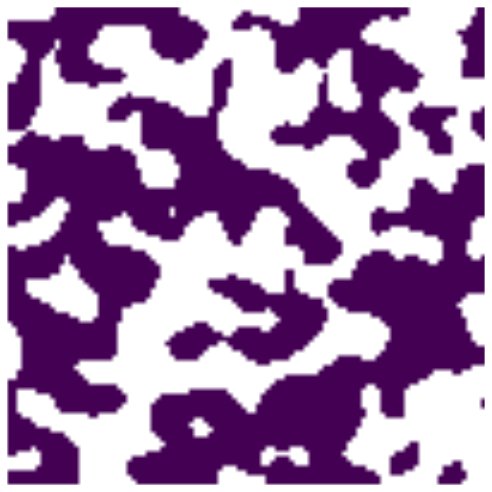

In [2]:
im = ps.generators.blobs(shape=[100, 100, 100])
plt.figure(figsize=[7,7]);
plt.axis(False);
ps.visualization.imshow(im);
#default values:
spacing=0
trim_edges=True

## Apply filter function

### spacing

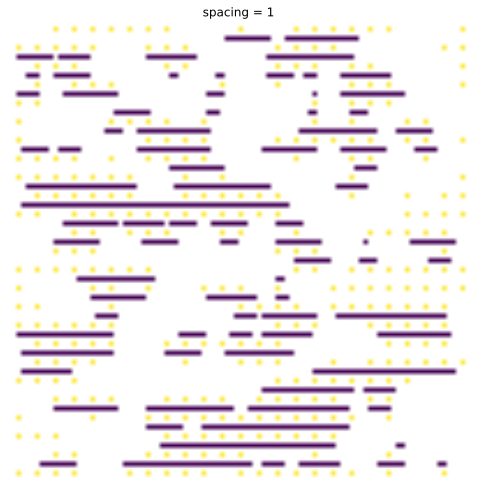

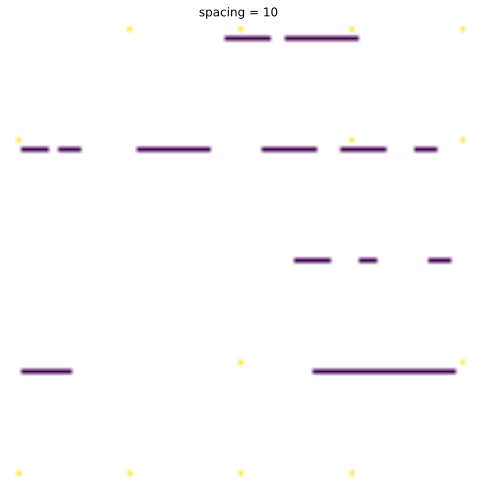

In [3]:
x = ps.filters.apply_chords_3D(im, spacing, trim_edges)
xx = ps.filters.apply_chords_3D(im, 10, trim_edges)

fig, ax = plt.subplots(figsize=[7, 7]);
ps.visualization.imshow(x);
plt.axis(False);
plt.title('spacing = 1');

fig, ax = plt.subplots(figsize=[7, 7]);
ps.visualization.imshow(xx);
plt.axis(False);
plt.title('spacing = 10');

### trim_edges

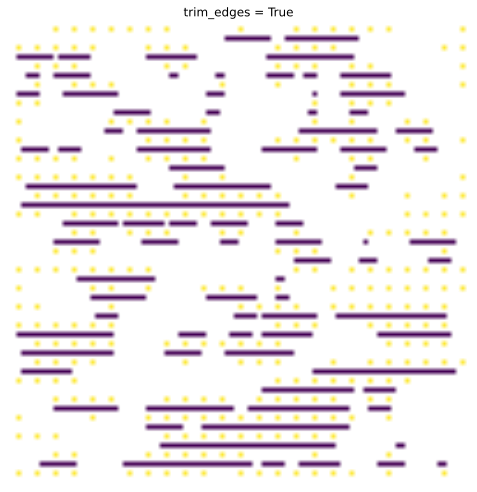

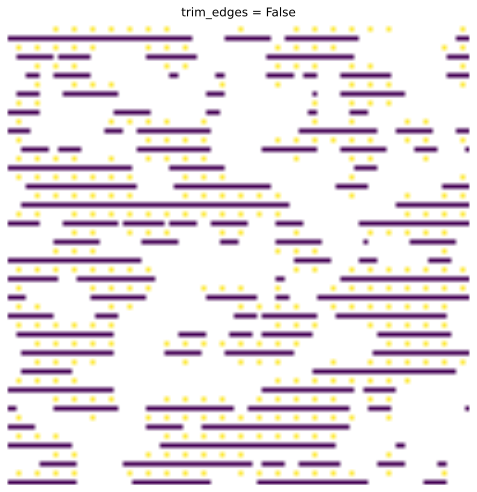

In [4]:
xx = ps.filters.apply_chords_3D(im, spacing, False)

fig, ax = plt.subplots(figsize=[7, 7]);
ps.visualization.imshow(x);
plt.axis(False);
plt.title('trim_edges = True');

fig, ax = plt.subplots(figsize=[7, 7]);
ps.visualization.imshow(xx);
plt.axis(False);
plt.title('trim_edges = False');